In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import xarray as xr
import gsw # https://teos-10.github.io/GSW-Python/gsw_flat.html
from sklearn.linear_model import LinearRegression

import matplotlib.patches as mpatches
from physoce import tseries as ts 
from scipy.signal import welch 
from scipy.stats import chi2 
from scipy import stats
from scipy.signal import periodogram
from datetime import timedelta

# Import and organize data

In [2]:
# ADCP data
adcp1 = xr.open_dataset('ADCP/adcp1.nc')
adcp1_5m = xr.open_dataset('ADCP/adcp1_5m.nc')
adcp1_10m = xr.open_dataset('ADCP/adcp1_10m.nc')
adcp1_10mroll = xr.open_dataset('ADCP/adcp1_10mroll.nc')

adcp2 = xr.open_dataset('ADCP/adcp2.nc')
adcp2_1m = xr.open_dataset('ADCP/adcp2_1m.nc')
adcp2_5m = xr.open_dataset('ADCP/adcp2_5m.nc')
adcp2_10m = xr.open_dataset('ADCP/adcp2_10m.nc')
adcp2_1mroll = xr.open_dataset('ADCP/adcp2_1mroll.nc')
adcp2_10mroll = xr.open_dataset('ADCP/adcp2_10mroll.nc')

# ADV data
adv1 = xr.open_dataset('ADV/adv1_dat.nc')
adv1sen = xr.open_dataset('ADV/adv1_sen.nc')
adv1_1m = xr.open_dataset('ADV/adv1_1m.nc')
adv1_5m = xr.open_dataset('ADV/adv1_5m.nc')
adv1_10m = xr.open_dataset('ADV/adv1_10m.nc')

adv2 = xr.open_dataset('ADV/adv2_dat.nc')
adv2sen = xr.open_dataset('ADV/adv2_sen.nc')
adv2_1m = xr.open_dataset('ADV/adv2_1m.nc')
adv2_5m = xr.open_dataset('ADV/adv2_5m.nc')
adv2_10m = xr.open_dataset('ADV/adv2_10m.nc')

# Temperature data
temp = xr.open_dataset('Temperature/temp_qc.nc')
temp_5m = xr.open_dataset('Temperature/temp_5m')
temp_10m = xr.open_dataset('Temperature/temp_5m')
temp_10mroll = xr.open_dataset('Temperature/temp_5m')

# SeaPHOX data
spx = xr.open_dataset('SeaPHOX/seaphox.nc')

# M1 data
m1_ns = xr.open_dataset('M1/m1_ns.nc')
m1_ew = xr.open_dataset('M1/m1_ew.nc')
m1_temp = xr.open_dataset('M1/m1_temp.nc')
m1_wind = xr.open_dataset('M1/m1_wind.nc')

# NBDC 46042 data
nbdc_july = xr.open_dataset('46042_Buoy/nbdc_july.nc')
nbdc_aug = xr.open_dataset('46042_Buoy/nbdc_aug.nc')
nbdc_sept = xr.open_dataset('46042_Buoy/nbdc_sept.nc')

In [ ]:
# Filter unwanted data
# For adcp
adcp1 = adcp1.where((adcp1.Flag < 4) & (adcp1.Depth > 8))
adcp2 = adcp2.where((adcp2.Flag < 4) & (adcp2.Depth > 8))

# For adv
adv1 = adv1.where(adv1.Dat_flag < 5)
adv2 = adv2.where(adv2.Dat_flag < 5)

# For seaphox
spxqc = spx.where(spx.QC < 2)

In [9]:
# Average out data to 1, 5, and 10 minutes intervals

# ADCP data (first deployment)
#adcp1_5m = adcp1.resample(time='5Min').mean()
#adcp1_10m = adcp1.resample(time='10Min').mean()
#adcp1_10mroll = adcp1.isel(BinDist=1).rolling(time=10).mean() # Conduct a 10 minute rolling time to see how it compares


# ADCP data (second deployment)
#adcp2_1m = adcp2.resample(time='1Min').mean()
#adcp2_5m = adcp2.resample(time='5Min').mean()
#adcp2_10m = adcp2.resample(time='10Min').mean()
#adcp2_1mroll = adcp2.isel(BinDist=1).rolling(time=60).mean() # Conduct a 10 minute rolling time to see how it compares
#adcp2_10mroll = adcp2.isel(BinDist=1).rolling(time=600).mean() # Conduct a 10 minute rolling time to see how it compares
#=========================================================================================================================

print('ADV (first deployment)')
#adv1_1s = adv1.resample(time='1S').mean()
#adv1_1m = adv1.resample(time='1Min').mean()
#adv1_5m = adv1.resample(time='5Min').mean()
#adv1_10m = adv1.resample(time='10Min').mean()
#adv1_1mroll = adv1.rolling(time=1).mean()
#adv1_10mroll = adv1.rolling(time=10).mean()

print('ADV (second deployment)')
#adv2_1s = adv2.resample(time='1S').mean()
#adv2_1m = adv2.resample(time='1Min').mean()
#adv2_5m = adv2.resample(time='5Min').mean()
#adv2_10m = adv2.resample(time='10Min').mean()
#adv2_1mroll = adv2.rolling(time=1).mean()
#adv2_10mroll = adv2.rolling(time=10).mean()

#=========================================================================================================================
print('temperature')
#temp_5m = temp.resample(time='5min').mean()
#temp_10m = temp.resample(time='10min').mean()
#temp_10mroll = temp.rolling(time=10).mean()

ADV (first deployment)
ADV (second deployment)
temperature


In [11]:
#adcp1_5m.to_netcdf('ADCP/adcp1_5m.nc')
#adcp1_10m.to_netcdf('ADCP/adcp1_10m.nc')
#adcp1_10mroll.to_netcdf('ADCP/adcp1_10mroll.nc')

#adcp2_1m.to_netcdf('ADCP/adcp2_1m.nc')
#adcp2_5m.to_netcdf('ADCP/adcp2_5m.nc')
#adcp2_10m.to_netcdf('ADCP/adcp2_10m.nc')
#adcp2_1mroll.to_netcdf('ADCP/adcp2_1mroll.nc')
#adcp2_10mroll.to_netcdf('ADCP/adcp2_10mroll.nc')

#adv1_1s.to_netcdf('ADV/adv1_1s.nc')
#adv1_1m.to_netcdf('ADV/adv1_1m.nc')
#adv1_5m.to_netcdf('ADV/adv1_5m.nc')
#adv1_10m.to_netcdf('ADV/adv1_10m.nc')

#adv2_1s.to_netcdf('ADV/adv2_1s.nc')
#adv2_1m.to_netcdf('ADV/adv2_1m.nc')
#adv2_5m.to_netcdf('ADV/adv2_5m.nc')
#adv2_10m.to_netcdf('ADV/adv2_10m.nc')

#temp_5m.to_netcdf('Temperature/temp_5m')
#temp_10m.to_netcdf('Temperature/temp_5m')
#temp_10mroll.to_netcdf('Temperature/temp_5m')

# ANALYSIS
- Look at general overiew of time series
- Identify points of interest
    - Cooling and onshore transport events
    - Upwelling periods
- Look at velocity profiles and data from cooling events
    - Identify "good" ensembles of data over the duration of these events
    - Look at profiles from ADCP and make note of flow patterns during these events
        - Modal analysis?
- Spectral analysis of "good" data ensembles
    - Try to use esembles that occur during cooling events
- Temperature and stratification data
    - Use seaphox data to determine the relationship of temperature and salinity on density in the water column
        - Thermal expansion and haline coefficients
    - Use these rates to generate density profiles for the deployments
    - Calculate Richardson number gradient profiles
- Calculating dissipation rate from spectral data

### Dataset can be divided into two deployments (d1 and d2)

In [3]:
# Deployment 1

# Slice datasets by most limiting timeframe
# Temperature
temp_dep1 = temp.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))

# ADCP
adcp_dep1 = adcp1.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adcp_10mroll_dep1 = adcp1_10mroll.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000')) # 10 min rolling window for better looking data

# ADV
adv_dep1 = adv1.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_1m_dep1 = adv1_1m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))# Using 1min average since raw data is too chaotic
adv_5m_dep1 = adv1_5m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_10m_dep1 = adv1_10m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))


### Plot velocity components in relation to temperature time series for D1

Text(0.5, 1.0, 'Velocity direction (1m Above Seafloor)')

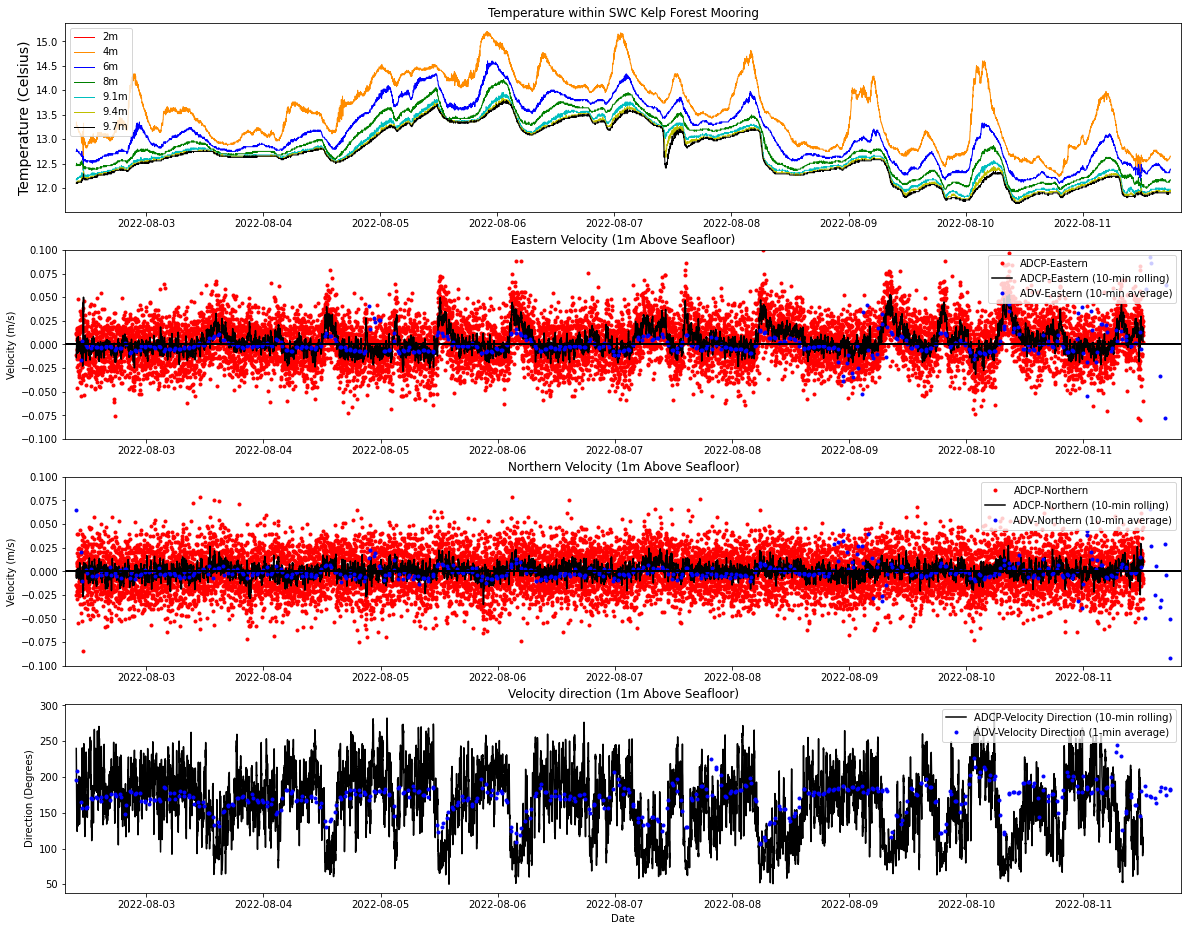

In [13]:
# TEMPERATURE
plt.figure(figsize = (20,16))

plt.subplot(411)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# Eastern Velocity
plt.subplot(412)
plt.plot(adcp_dep1.time, adcp_dep1.East.isel(BinDist=1), '.r', label = 'ADCP-Eastern')
plt.plot(adcp_10mroll_dep1.time, adcp_10mroll_dep1.East,'-k', label = 'ADCP-Eastern (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.East, '.b', label = 'ADV-Eastern (10-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.title('Eastern Velocity (1m Above Seafloor)')
#=================================================================================================
# Northern Velocity
plt.subplot(413)
plt.plot(adcp_dep1.time, adcp_dep1.North.isel(BinDist=1), '.r', label = 'ADCP-Northern')
plt.plot(adcp_10mroll_dep1.time, adcp_10mroll_dep1.North,'-k', label = 'ADCP-Northern (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.North, '.b', label = 'ADV-Northern (10-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.title('Northern Velocity (1m Above Seafloor)')
#=================================================================================================
# Velocity direction
plt.subplot(414)
plt.plot(adcp_10mroll_dep1.time, adcp_10mroll_dep1.Direction,'-k', label = 'ADCP-Velocity Direction (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.CDIR, '.b', label = 'ADV-Velocity Direction (1-min average)')
plt.legend(loc = 'upper right')
plt.margins(x=.01)
plt.ylabel('Direction (Degrees)')
plt.xlabel('Date')
plt.title('Velocity direction (1m Above Seafloor)')

## Cooling events
- Cooling event triggered by dramatic drop in temperature and simultaneous dramatic increase in northereastern velocity (0 < velocity < 90)
- Events appear to occur on diurnal to semidiiurnal basis
- Due to orientation of SWC and location of the site, NE velocity is associated with ONSHORE transport
- Visibly looks correlated to tidal cycle

In [14]:
# Create depth average temperature time series for deployment 1
temp_dep1_da = temp_dep1.Temperature.mean(axis=0)

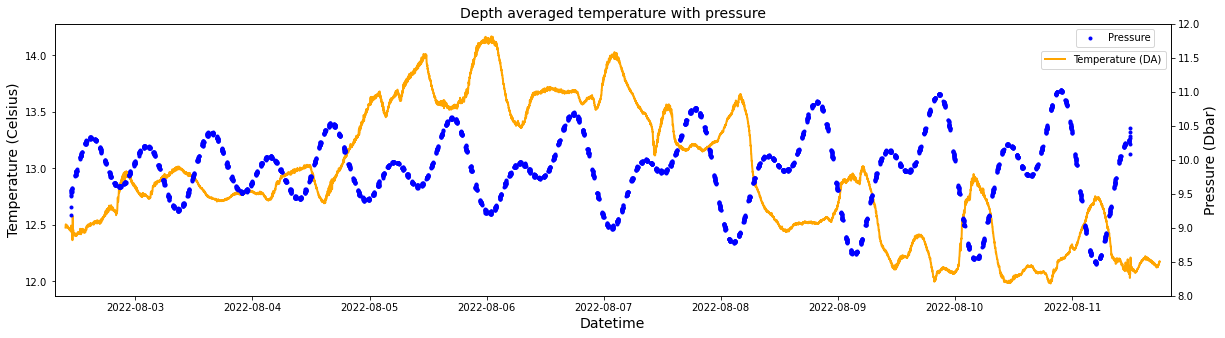

In [15]:
# Compare temperature with pressure over time
fig,ax = plt.subplots(figsize = (20, 5))

# make a plot
lns1 = ax.plot(temp_dep1_da.time, temp_dep1_da, 'orange', lw = 2, label='Temperature (DA)')
# set x-axis label
ax.set_xlabel("Datetime", fontsize = 14)
# set y-axis label
ax.set_ylabel("Temperature (Celsius)", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(adv_1m_dep1.time, adv_1m_dep1.Pressure, '.b', lw = 2, label='Pressure')
ax2.set_ylim(8,12)
ax2.set_ylabel("Pressure (Dbar)",fontsize=14)


# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(loc=1, bbox_to_anchor=(1,.92)) #(leg, labs, loc=0)
plt.axhline(y=359, c='black', lw=2)
plt.axhline(y=280, c='black', lw=2)
plt.title('Depth averaged temperature with pressure', fontsize=14)
plt.legend(bbox_to_anchor=(.99,1))

plt.margins(x=.01, y = .5)
#plt.show()

### Cooling events heavily coincide with rising tide
- Cooling events appear to be driven by tides, pulling colder water from offshore into SWC
- Rate of sea level height appears to be NEGATIVELY correlated with rate of change for temperature

### Zoom in on single event
- Find "good" data
    - adv and adcp data which meets quality controlled standars
    - adv especially needs to be good for future spectral analysis

In [ ]:
test = adv_dep1.where(adv_dep1.Dat_flag < 5)
test = test.dropna(dim = 'time', how="any")
gburst = np.unique(test.Burst_number, return_counts=True)
for i in range(len(np.unique(test.Burst_number))):
    if gburst[1][i]>= 34560:
        print(gburst[0][i])

<ipython-input-16-7e11c3b47b27>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(adcp_dep1_ce.time, adcp_dep1_ce.BinDist, adcp_dep1_ce.East,norm=norm)


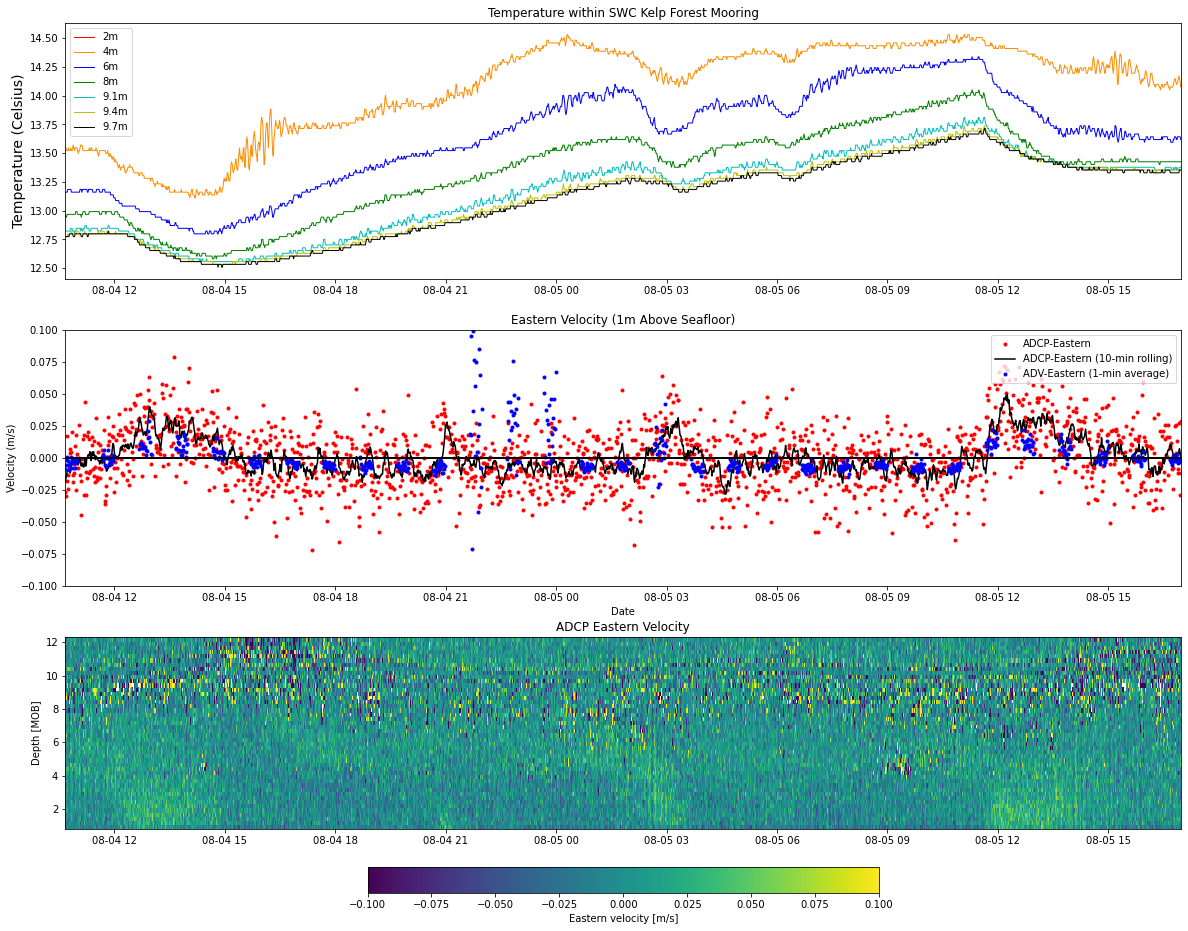

In [16]:
# String of good data from burst numbers 108-111
gdat = adv_dep1.where((adv_dep1.Burst_number >= 50) & (adv_dep1.Burst_number <= 80))
gdat = gdat.dropna(dim = 'time', how="any")
temp_dep1_ce = temp_dep1.sel(time=slice(gdat.time[0], gdat.time[-1]))
adv_1m_dep1_ce = adv_1m_dep1.sel(time=slice(gdat.time[0], gdat.time[-1]))
adcp_dep1_ce = adcp_dep1.sel(time=slice(gdat.time[0], gdat.time[-1]))
adcp_10mroll_dep1_ce = adcp_10mroll_dep1.sel(time=slice(gdat.time[0], gdat.time[-1]))

# TEMPERATURE
plt.figure(figsize = (20,16))

plt.subplot(311)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp_dep1_ce.time, temp_dep1_ce.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.margins(x=0)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# Eastern
plt.subplot(312)
plt.plot(adcp_dep1_ce.time, adcp_dep1_ce.East.isel(BinDist=1), '.r', label = 'ADCP-Eastern')
plt.plot(adcp_10mroll_dep1_ce.time, adcp_10mroll_dep1_ce.East, '-k', label = 'ADCP-Eastern (10-min rolling)')
plt.plot(adv_1m_dep1_ce.time, adv_1m_dep1_ce.East, '.b', label = 'ADV-Eastern (1-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=0)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Date')
plt.title('Eastern Velocity (1m Above Seafloor)')
#=================================================================================================
# Current profile
plt.subplot(313)
minvel = -.1 # Limits for the colorbars used on the adcp colorplots
maxvel = .1
norm = matplotlib.colors.Normalize(vmin=minvel,vmax=maxvel)
plt.title('ADCP Eastern Velocity')
plt.pcolormesh(adcp_dep1_ce.time, adcp_dep1_ce.BinDist, adcp_dep1_ce.East,norm=norm)
plt.colorbar(label='Eastern velocity [m/s]', orientation = 'horizontal', fraction = .1)
plt.ylabel('Depth [MOB]')
plt.margins(x=.01)

### Bursts 53 and 75 are both during cooling event periods
- Next step is to conduct spectral analysis of these bursts

In [147]:
# THE FOLLOWING CODE IS ADAPTED FROM STEVEN CUNNINGHAM'S MASTERS THESIS (2019)

# Rotate velocity data along the principle axes U and V
theta, major, minor = ts.princax(adv_dep1.East, adv_dep1.North) # theta = angle, major = SD major axis (U), SD minor axis (V)
U, V = ts.rot(adv_dep1.East, adv_dep1.North, -theta)
adv_dep1['U'] = U
adv_dep1['V'] = V

In [148]:
# Isolate the good bursts
b53 = adv_dep1.where(adv_dep1.Burst_number == 53).dropna(dim = 'time', how="any")
b75 = adv_dep1.where(adv_dep1.Burst_number == 75).dropna(dim = 'time', how="any")

In [149]:
# Fast Fourier Transform algorithm on major axis 'U'
b53_U_fft = np.fft.fft(b53.U)
b75_U_fft = np.fft.fft(b75.U)

# Calculate spectra and frequency, where delta t is the sample rate
N = 38400 # Length of each burst
delta_t = (1/32) # 32Hz sample frequency
f = np.fft.fftfreq(N, delta_t)
S53 = (2/N) * delta_t * np.abs(b53_U_fft)**2
S75 = (2/N) * delta_t * np.abs(b75_U_fft)**2

In [153]:
# Smoothing out the spectra
f4_b53, S4_b53 = welch(b53.U, fs=32, nperseg= 2240, window='hanning', detrend='linear')
f4_b53p, S4_b53p = welch(b53.Pressure, fs=32, nperseg= 2240, window='hanning', detrend='linear') # Feddderson uses 70s windows

In [151]:

fU,SU = periodogram(b53.U, fs=32)
fP,SP = periodogram(b53.Pressure, fs=32)

(1e-11, 1)

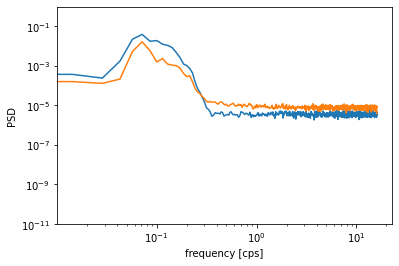

In [154]:
plt.figure()
plt.loglog(f4_b53p,S4_b53p)
plt.xlabel('frequency [cps]')
plt.loglog(f4_b53,S4_b53)
plt.ylabel('PSD')
plt.ylim([1e-11,1])

# Spectral analysis and turbulent dissipation estimates
- Additional QC of adv data is used to flag data runs (bursts of data) that have gaps of high correlation and signal strength (SNR)
- Parameters for dissipation QC are used from Fedderson, 2010 ("Quality controlling surf zone acoustic Doppler velocimeter observations to estimate the turbulent dissipation rate")
    - SNR on each beam should be > 15dB
    - CORR on each beam should be above .3 + .4(SQRT(f_s/f_max)), where f_s is the instrument sampling frequency, and f_max is the maximum sampling frequency the instrument is capable of 
    - Fraction of "bad data" to good data for each run is determined as sigmaSS and sigmaCORR
        - sigmaSS <= .1 (34560/38400 data points, or two minutes of "bad data" allowed)
        - sigmaCORR <= .7 (11520/38400 data points, or 14 minutes of "bad data" allowed)
    - Bad data runs that do not meet these criteria are discarded, and the remaining good data runs are "fixed"
        - Gaps in data <= 1s long are linearly interpolated between the good data points bounding the gap
        - Longer gaps are averaged and the entire gap is set to the averaged value
        - If the gap is significantly longer than a couple seconds, "patching" may be used
        - Patching removes the larger gaps in data and joins the good data points together, but may cause bias via time shifting in the frequency spectra

In [60]:
def e_data_filter(ds):
    # Check for sigmaSS and sigmaCORR in both adv datasets
    # ySS = 15, yCORR = .5

    # Start by filtering data that doesn't pass the SNR test
    print('Filtering SNR')
    ySS = xr.zeros_like(ds.East)
    ySS = ySS + xr.where((ds.SNR_B1 >= 15), 0, 1)
    ySS = ySS + xr.where((ds.SNR_B2 >= 15), 0, 1)
    ySS = ySS + xr.where((ds.SNR_B3 >= 15), 0, 1)
    ySS = ds.where(ySS < 1)
    ySS['Burst_number'] = ds.Burst_number
    ySS['Pressure'] = ds.Pressure
    print('Finding number of good bursts')
    ndata = ySS.groupby('Burst_number').count().Vertical
    sigSS = np.array([np.unique(ySS.Burst_number), ndata])
    sigSS = np.where(sigSS[1] >= (38400*.9), sigSS[0], np.nan)
    sigSS = sigSS[~np.isnan(sigSS)]
    print('Creating gdat')
    gdat = ySS.where(ySS.Burst_number.isin(sigSS), drop=True)

    # Then filter data that doesn't pass the correlation test, but use the gdat dataset
    print('Filtering correlation')
    yCORR = xr.zeros_like(gdat.East)
    yCORR = yCORR + xr.where((gdat.Correlation_B1 >= 15), 0, 1)
    yCORR = yCORR + xr.where((gdat.Correlation_B2 >= 15), 0, 1)
    yCORR = yCORR + xr.where((gdat.Correlation_B3 >= 15), 0, 1)
    yCORR = gdat.where(yCORR < 1)
    yCORR['Burst_number'] = gdat.Burst_number
    yCORR['Pressure'] = gdat.Pressure
    print('Finding number of good bursts')
    ndata = yCORR.groupby('Burst_number').count().Vertical
    sigCORR = np.array([np.unique(yCORR.Burst_number), ndata])
    sigCORR = np.where(sigCORR[1] >= (38400*.3), sigCORR[0], np.nan)
    sigCORR = sigCORR[~np.isnan(sigCORR)]
    print('Creating gdat')
    gdat = yCORR.where(yCORR.Burst_number.isin(sigCORR), drop=True)
    gdat = gdat.drop(labels=['CSPD', 'CDIR', 'Checksum', 'Dat_flag'])
    
    return gdat

In [4]:
#e1 = e_data_filter(adv1)
#e1.to_netcdf('ADV/e1.nc')
e1 = xr.open_dataset('ADV/e1.nc')

#e2 = e_data_filter(adv2)
#e2.to_netcdf('ADV/e2.nc')
e2 = xr.open_dataset('ADV/e2.nc')

In [86]:
delta = timedelta(seconds=1, milliseconds = 31.25)
e1_inter = e1.interpolate_na(dim="time", method="linear", max_gap = delta)

In [51]:
mask = e1_inter.where(e1_inter.East.isnull() == True, drop = True)
mask

<xarray.Dataset>
Dimensions:         (time: 105)
Coordinates:
  * time            (time) datetime64[ns] 2022-08-02T13:40:00 ... 2022-08-06T...
Data variables:
    Burst_number    (time) float64 5.0 5.0 36.0 36.0 ... 77.0 77.0 77.0 104.0
    East            (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    North           (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    Vertical        (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    SNR_B1          (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    SNR_B2          (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    SNR_B3          (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    Correlation_B1  (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    Correlation_B2  (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    Correlation_B3  (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    Pressure        (time) float64 10.22 10.21 9.621 9.626 ... 10.15 10.15 10.66
Attributes:
    description:  ADV data

In [48]:
dat = adv1.where(test.time, drop = True)
dat

<xarray.Dataset>
Dimensions:         (time: 105)
Coordinates:
  * time            (time) datetime64[ns] 2022-08-02T13:40:00 ... 2022-08-06T...
Data variables:
    Burst_number    (time) float64 5.0 5.0 36.0 36.0 ... 77.0 77.0 77.0 104.0
    East            (time) float64 -0.023 -0.003 0.018 ... 0.021 0.02 -0.003
    North           (time) float64 -0.022 -0.012 0.005 ... -0.013 -0.023 0.003
    Vertical        (time) float64 0.001 0.002 0.0 -0.001 ... 0.002 0.002 0.0
    CSPD            (time) float64 0.03183 0.01237 0.01868 ... 0.03048 0.004243
    CDIR            (time) float64 223.7 256.0 15.52 35.75 ... 148.2 131.0 315.0
    SNR_B1          (time) float64 14.6 14.2 14.2 16.8 ... 18.9 18.9 20.6 24.5
    SNR_B2          (time) float64 22.4 23.6 15.5 14.6 ... 14.2 15.9 14.2 14.2
    SNR_B3          (time) float64 26.7 26.7 17.6 18.5 ... 12.5 14.2 19.4 21.5
    Correlation_B1  (time) float64 91.0 87.0 98.0 98.0 ... 99.0 99.0 98.0 97.0
    Correlation_B2  (time) float64 98.0 98.0 97.0 97.0 ... 98.0 98.0 98.0 99.0
    Correlation_B3  (time) float64 99.0 99.0 99.0 99.0 ... 98.0 99.0 99.0 99.0
    Pressure        (time) float64 10.22 10.21 9.621 9.626 ... 10.15 10.15 10.66
    Checksum        (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Dat_flag        (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    description:  ADV data

In [53]:
len(np.unique(mask.Burst_number))

4

In [56]:
umask = np.unique(mask.Burst_number)
umask[0]

5.0

In [67]:
a = dat.where(dat.Burst_number.isin(umask[0]), drop = True)
a

<xarray.Dataset>
Dimensions:         (time: 2)
Coordinates:
  * time            (time) datetime64[ns] 2022-08-02T13:40:00 2022-08-02T13:4...
Data variables:
    Burst_number    (time) float64 5.0 5.0
    East            (time) float64 -0.023 -0.003
    North           (time) float64 -0.022 -0.012
    Vertical        (time) float64 0.001 0.002
    CSPD            (time) float64 0.03183 0.01237
    CDIR            (time) float64 223.7 256.0
    SNR_B1          (time) float64 14.6 14.2
    SNR_B2          (time) float64 22.4 23.6
    SNR_B3          (time) float64 26.7 26.7
    Correlation_B1  (time) float64 91.0 87.0
    Correlation_B2  (time) float64 98.0 98.0
    Correlation_B3  (time) float64 99.0 99.0
    Pressure        (time) float64 10.22 10.21
    Checksum        (time) float64 0.0 0.0
    Dat_flag        (time) float64 1.0 1.0
Attributes:
    description:  ADV data

In [88]:
mean = np.mean(adv1.East.sel(time=slice(a.time[0], a.time[-1])))
mean

<xarray.DataArray 'East' ()>
array(-0.013)

In [96]:
e1_inter['East'].sel(time=slice(a.time[0], a.time[-1])) = mean

SyntaxError: cannot assign to function call (<ipython-input-96-92f0715005ee>, line 1)

In [104]:
e1_inter.East.where(e1_inter.Burst_number.isin(5), drop = True).values[0:2] = mean

In [106]:
e1_inter.East.where(e1_inter.Burst_number.isin(5), drop = True).values[0:2]

array([nan, nan])

In [105]:
e1_inter.East.where(e1_inter.Burst_number.isin(5), drop = True)

<xarray.DataArray 'East' (time: 38400)>
array([   nan,    nan,  0.018, ...,  0.005,  0.002, -0.003])
Coordinates:
  * time     (time) datetime64[ns] 2022-08-02T13:40:00 ... 2022-08-02T13:59:5...
Attributes:
    units:    m/s

In [80]:
np.std(gdat.Vertical)

<xarray.DataArray 'Vertical' ()>
array(0.00431337)

In [81]:
np.std(test.Vertical)

<xarray.DataArray 'Vertical' ()>
array(0.00431519)

# Determining density stratification
- Kelp-forest mooring does not have conductivity/salinity data, only in-situ temperature
- Use multi-year seapHOx data to evaluate whether temperature or salinity plays a larger role in influencing density

In [14]:
# seapHOx data: spx

# Create subset of quality controlled data from summer months
spxqc = spx.where(spx.QC < 2)
spxs = spxqc.isel(time=spxqc.time.dt.month.isin([6, 7, 8])) # Flagged seaphox data during only summer months (June-August)
spxs = spxs.where(spxs.Density > 24.5).dropna(dim = 'time', how="any") # Filter out data that shows anomalously fresh waters

In [113]:
# Relevant variables and the means of the variables to serve as the constants
P = spxs.Pressure
SA = spxs.SA
SA_mean = np.mean(SA)
CT = spxs.CT
CT_mean = np.mean(CT)


rho_constant_SA = gsw.rho(SA_mean, CT, P) - 1000 # Constant absolute salinity with changing temperature
rho_constant_CT = gsw.rho(SA, CT_mean, P) - 1000 # Constant conservative temperature with changing SA


CT_density = np.array(rho_constant_SA).reshape(-1,1)
SA_density = np.array(rho_constant_CT).reshape(-1,1)
real_density = np.array(spxs.Density).reshape(-1,1) # The in-situ density calculated from all in-situ variables
SA_reg = LinearRegression().fit(SA_density, real_density)
CT_reg = LinearRegression().fit(CT_density, real_density)

print(str('SA score: '), SA_reg.score(SA_density, real_density), str('CT score: '), CT_reg.score(CT_density, real_density))

SA score:  0.5618475790682038 CT score:  0.8184518453674094


If CT is held constant, the resulting density estimates are not good indicators of the true in-situ density, whereas a constant SA can still yield accurate density predictions
- CT is plays a larger role in determining density

### Using different methods to model density from kelp-forest mooring data
- Since kelp-forest mooring doesn't include any salinity data, these models will have to assume either a direct relationship between temperature and density, or assume a constant salinity

In [129]:
# METHOD 1: Use linear regression between in-situ temperature and in-situ density to estimate density
temperature = np.array(spxs.Temperature).reshape(-1,1) # in-situ temperature
density = np.array(spxs.Density).reshape(-1,1) # in-situ density

reg1 = LinearRegression().fit(temperature, density) # linear regression fit between the two variables

temp_density = (temperature * reg1.coef_[0]) + reg1.intercept_[0] # The density estimates calculated using the linear equation of 'reg1'

temp_density_reg = LinearRegression().fit(temp_density, density) # Fit a linear regression between the estimated density and in-situ density

print(str('R2: '), temp_density_reg.score(temp_density, density))

R2:  0.8432728701128316


In [117]:
# METHOD 2: Use constant salinity to estimate CT and then use both to estimate density
CT_est = gsw.conversions.CT_from_t(SA_mean, spxs.Temperature, P) # Estimate CT using mean value of SA from seapHOx data
rho_from_CT_est = gsw.rho(SA_mean, CT_est, P) # Estimate density using model CT and mean value of SA
rho_from_CT_est = np.array(rho_from_CT_est).reshape(-1,1)

reg2 = LinearRegression().fit(rho_from_CT_est, real_density)

print(str('R2: '), reg2.score(rho_from_CT_est, real_density))

R2:  0.8162029150667119


In [134]:
CT_lr = np.array(spxs.CT).reshape(-1,1)
SA_lr = np.array(spxs.SA).reshape(-1,1)

reg3 = LinearRegression().fit(CT_lr, SA_lr)
reg3.score(CT_lr, SA_lr)

0.17173485172723668

In [ ]:
# Method 1 yields a better R2, indicating that direct relationship between in-situ temperature and density is strong
# Apply method 1 to kelp-forest mooring data
rho_m1 = (temp.Temperature * temp_reg.coef_[0]) + temp_reg.intercept_[0]
temp['Rho_M1'] = (['depth', 'time'], rho_m1)

# Apply method 2
pressure = temp.Pressure
CT_est = gsw.conversions.CT_from_t(SA_mean, temp.Temperature, pressure)
rho_from_CT_est = gsw.rho(SA_mean, CT_est, pressure) - 1000 # Estimate density using model CT and mean value of SA
temp['Rho_M2'] = (['depth', 'time'], rho_from_CT_est)

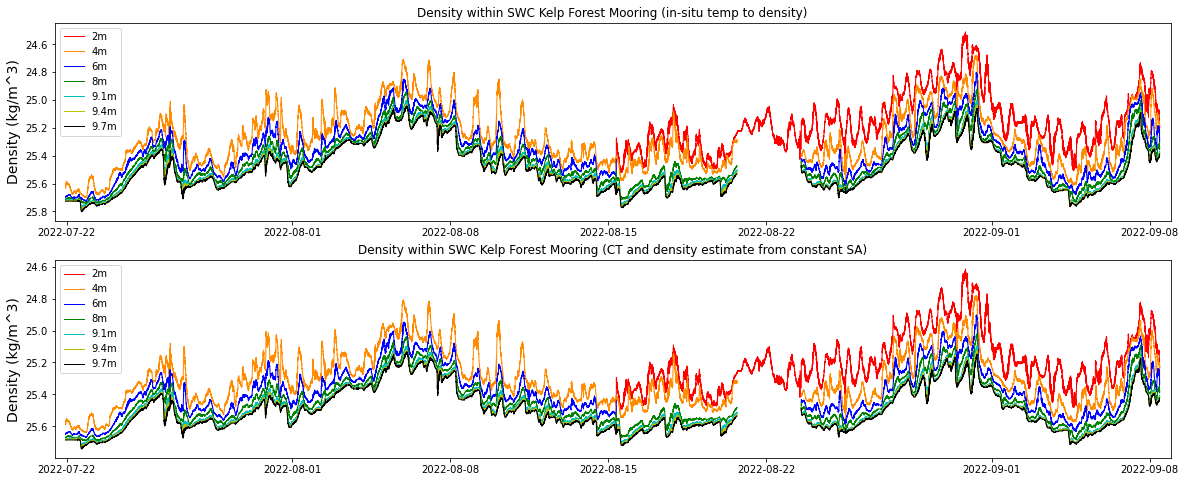

In [141]:
plt.figure(figsize = (20, 8))

plt.subplot(211)
plt.plot(temp.time, temp.Rho_M1.isel(depth=0), 'r-', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=2), 'b-', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=3), 'g-', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=4), 'c-', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=5), 'y-', lw = 1)
plt.plot(temp.time, temp.Rho_M1.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Density (kg/m^3)", fontsize=14)
plt.margins(x=.01)
plt.title('Density within SWC Kelp Forest Mooring (in-situ temp to density)')
plt.gca().invert_yaxis()
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')

plt.subplot(212)
plt.plot(temp.time, temp.Rho_M2.isel(depth=0), 'r-', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=2), 'b-', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=3), 'g-', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=4), 'c-', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=5), 'y-', lw = 1)
plt.plot(temp.time, temp.Rho_M2.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Density (kg/m^3)", fontsize=14)
plt.margins(x=.01)
plt.title('Density within SWC Kelp Forest Mooring (CT and density estimate from constant SA)')
plt.gca().invert_yaxis()
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')

### Takeaways
- Little to no difference between the two methods
- Density appears to follow temperature very closely, as shown by R2 values from method 1
- Not many visible periods of intense mixing, even during cooling events
    - Water column remains fairly stratified at all times
    - Does kelp forest stabilize the water column?
    - Based on the stratification, I expect low turbulence
### Potential questions
- Does kelp forest stabilize the water column?
    - At what stipe bundle density might this stabilization occur?
    - Is SWC always stratified like this?
- How does the stratification change with the stipe bundle density/radii?
- High dissipation rate as kelp filters faster currents via wake?
- Does adv proximity to stipe bundles matter?

In [ ]:
tmean = temp.mean() # 12.29
kv = .000001225 # kv found on https://www.omnicalculator.com/physics/water-viscosity
Re = 1000 # Re number where turbulence is observed
Vmean = adv.Magnitude.mean() # .0343 m/s

# Re = Vmean * diameter / kv, diameter = Re * kv/ Vmean
diam = ((Re * kv)/Vmean)

In [343]:
# Above data coincides with weeks 2 and 3
# survey_dates[1:3]
kelp_diam_w1_3 = kelp_diam_w2_3.append(kelp_diam_w1)

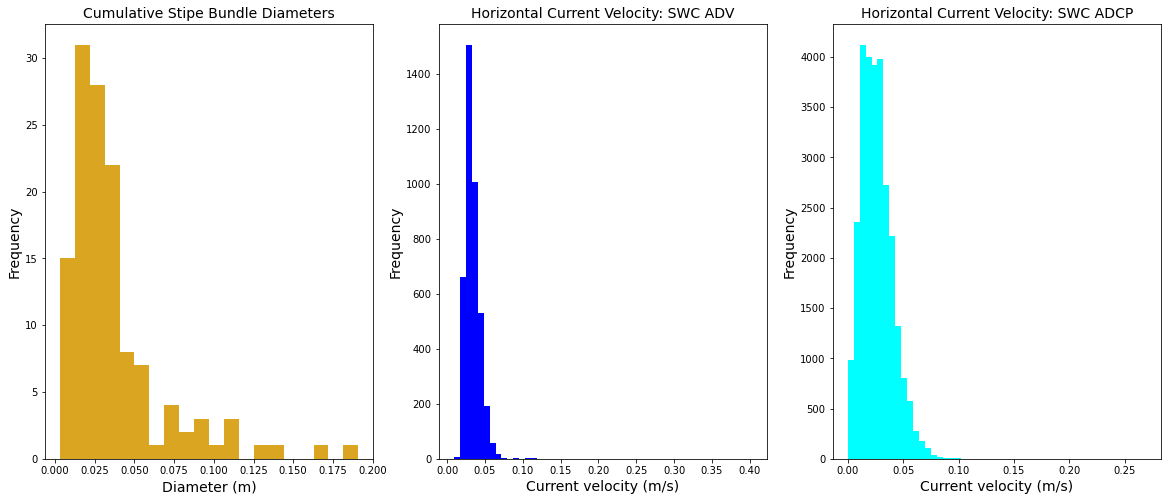

In [419]:
#survey_dates[0:3]
#kelp_diam_w1_3.stack()
plt.figure(figsize = (20,8))

plt.subplot(131)
plt.hist(kelp_diam_w1_3.stack()/100, bins =20, color = 'goldenrod')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Diameter (m)', fontsize = 14)
plt.title('Cumulative Stipe Bundle Diameters', fontsize = 14)

plt.subplot(132)
plt.hist(adv01_1min.Magnitude, bins=50, color = 'blue')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADV', fontsize = 14)

plt.subplot(133)
plt.hist(adcp01.Magnitude.isel(BinDist = 1), bins=50, color = 'cyan')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADCP', fontsize = 14)

plt.savefig('Plots/Dep1_kelp_current_histograms')

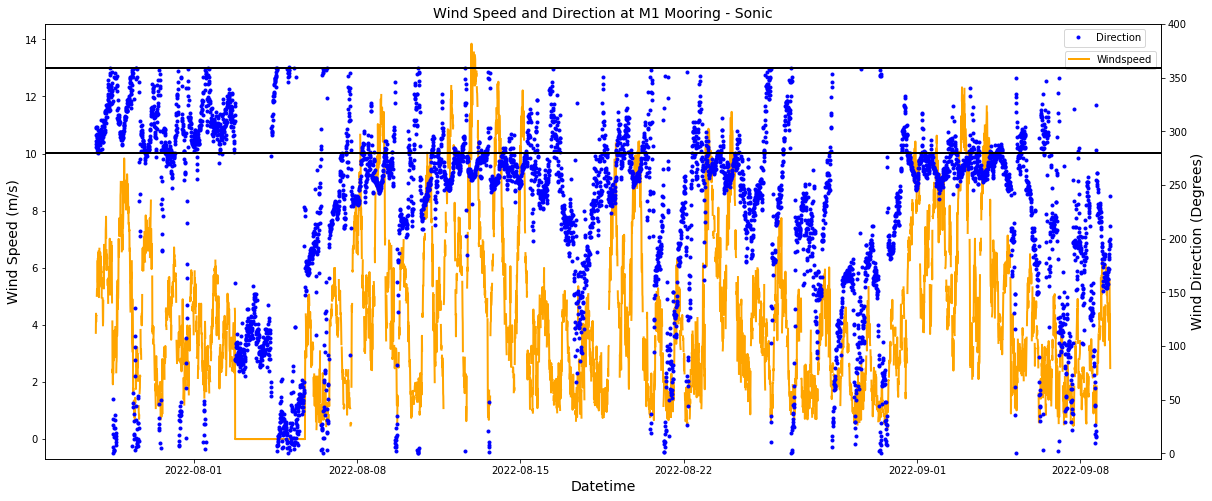

In [59]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20, 8))

# make a plot

lns1 = ax.plot(m1_wind.time, m1_wind.wind_speed_sonic, 'orange', lw = 2, label='Windspeed')
# set x-axis label
ax.set_xlabel("Datetime", fontsize = 14)
# set y-axis label
ax.set_ylabel("Wind Speed (m/s)", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(m1_wind.time, m1_wind.wind_from_direction_sonic, '.b', lw = 2, label='Direction')
ax2.set_ylim(-5,400)
ax2.set_ylabel("Wind Direction (Degrees)",fontsize=14)


# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(loc=1, bbox_to_anchor=(1,.95)) #(leg, labs, loc=0)
plt.axhline(y=359, c='black', lw=2)
plt.axhline(y=280, c='black', lw=2)
plt.title('Wind Speed and Direction at M1 Mooring - Sonic', fontsize=14)
plt.legend(bbox_to_anchor=(.99,1))

plt.margins(x=.01, y = .5)
#plt.show()
#plt.savefig('Plots/m1_windspeed_+_direction.PNG')

In [ ]:
# Import kelp survey data
kelp = pd.read_csv('Kelp/kelp_data_noLR.csv')

kelp_diam_w1 = kelp_diam.iloc[0:8,:]
w1_mean = kelp_diam_w1.stack().mean()
w1_max = kelp_diam_w1.stack().max()
w1_min = kelp_diam_w1.stack().min()

kelp_diam_w2 = kelp_diam.iloc[8:18,:]
w2_mean = kelp_diam_w2.stack().mean()
w2_max = kelp_diam_w2.stack().max()
w2_min = kelp_diam_w2.stack().min()

kelp_diam_w3 = kelp_diam.iloc[18:33,:]
w3_mean = kelp_diam_w3.stack().mean()
w3_max = kelp_diam_w3.stack().max()
w3_min = kelp_diam_w3.stack().min()

kelp_diam_w4 = kelp_diam.iloc[33:48,:]
w4_mean = kelp_diam_w4.stack().mean()
w4_max = kelp_diam_w4.stack().max()
w4_min = kelp_diam_w4.stack().min()

kelp_diam_w5 = kelp_diam.iloc[48:,:]
w5_mean = kelp_diam_w5.stack().mean()
w5_max = kelp_diam_w5.stack().max()
w5_min = kelp_diam_w5.stack().min()

density_w1 = kelp_diam_w1.count().sum() / 286.28
density_w2 = kelp_diam_w2.count().sum() / 286.28
density_w3 = kelp_diam_w3.count().sum() / 286.28
density_w4 = kelp_diam_w4.count().sum() / 286.28
density_w5 = kelp_diam_w5.count().sum() / 286.28
density_arr = [density_w1, density_w2, density_w3, density_w4, density_w5]

kelp_mean_arr = np.array([w1_mean, w2_mean, w3_mean, w4_mean, w5_mean])
kelp_max_arr = np.array([w1_max, w2_max, w3_max, w4_max, w5_max])
kelp_min_arr = np.array([w1_min, w2_min, w3_min, w4_min, w5_min])

kelp['Date'] = pd.to_datetime(kelp['Date'])
survey_dates = np.unique(kelp['Date'])

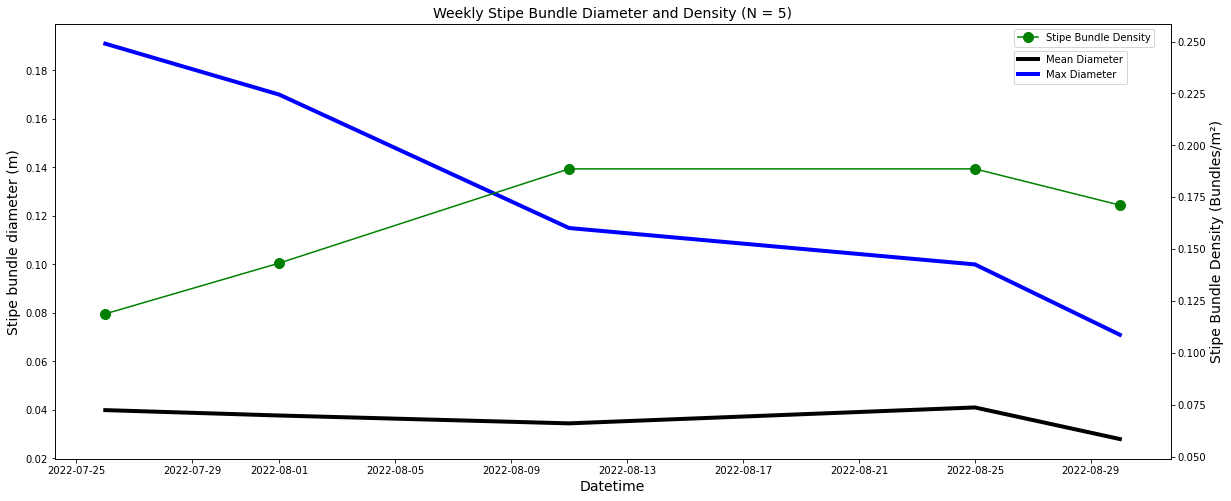

In [492]:
fig,ax = plt.subplots(figsize = (20, 8))

ax.plot(survey_dates, kelp_mean_arr/100, '-k', lw = 4, label= 'Mean Diameter')
ax.plot(survey_dates, kelp_max_arr/100, '-b', lw = 4, label = 'Max Diameter')

ax2=ax.twinx()
ax2.plot(survey_dates, density_arr, '-g', marker = 'o', ms = 10, label = 'Stipe Bundle Density')

ax.legend(loc=1, bbox_to_anchor=(.965,.95))
ax2.legend(bbox_to_anchor=(.99,1))
ax.set_ylabel('Stipe bundle diameter (m)', fontsize = 14)
ax2.set_ylabel('Stipe Bundle Density (Bundles/m\u00b2)', fontsize = 14)
ax.set_xlabel('Datetime', fontsize = 14)
plt.title('Weekly Stipe Bundle Diameter and Density (N = 5)', fontsize = 14)
plt.margins(x=.01, y = 1)



plt.savefig('Plots/kelp_timeseries')